# Options pricing with Black and Scholes formula

Dans le cadre du modèle de Black-Scholes, le prix d’un call de maturité T
et de strike K est :

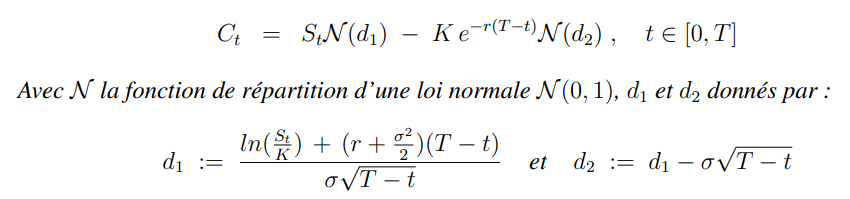

La formule de Parité Call Put s’écrit :

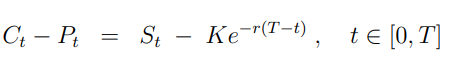

Et donc le prix du Put est donné par :

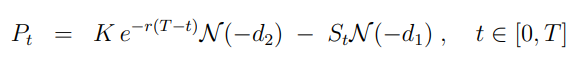

In [9]:
from scipy.stats import norm
import numpy as np

In [28]:
def Options_Black_Scholes_Pricing(t, T, K, St, r, sigma):

    d1 =  np.log(St / K) + (r + sigma**2 / 2)*(T-t)  / ( sigma * np.sqrt(T-t) )
    d2 = d1 - sigma * np.sqrt(T-t)
    
    Ct = St * norm.cdf(d1, 0, 1) - K * np.exp(-r*(T-t)) * norm.cdf(d2, 0, 1)   # A call price
    Pt = K * np.exp(-r*(T-t)) * norm.cdf(-d2, 0, 1) - St * norm.cdf(-d1, 0, 1) # A put price
    
    prices = {
        "European Call price :": Ct,
        "European Put price :": Pt,
        "Delta of the Call": norm.cdf(d1, 0, 1),
        "Delta of the Put": -norm.cdf(-d1, 0, 1)
    }
    
    return prices

In [29]:
t=0.0
T=0.25
K=100
St=100
r=0.1
sigma=0.25
prices = Options_Black_Scholes_Pricing(t, T, K, St, r, sigma)
print(prices)

{'European Call price :': 6.2544956097310305, 'European Put price :': 3.7854868125642938, 'Delta of the Call': 0.6035320073209945, 'Delta of the Put': -0.39646799267900545}


### Stratégie de couverture du call

La stratégie de couverture du call est définie par son delta donné par :

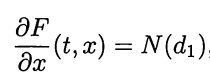

ou 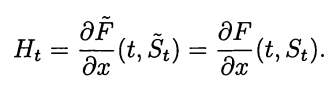

Où F est la prix de l'option à la date t, x le prix du sous-jacent et Ht la quantité d'actifs risqués à cette même date.

Dans notre cas, le delta du portefuille est : 0.6 

Cela signifie que la stratégie de couverture consiste à détenir une quantité de 0.6 actifs sous-jacents risqués et à placer

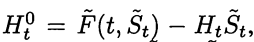

dans l'actif sans risque.

In [36]:
dict_values = prices.values()
dict_keys = prices.keys()
Values = []
for v, k in zip(dict_values, dict_keys):
    Values.append(v)
    
print(Values)

[6.2544956097310305, 3.7854868125642938, 0.6035320073209945, -0.39646799267900545]


In [37]:
# La quantité d'actifs risqués correspond à la troisième valeur du tableau
t = 0
r = 0.1
St = 100
S0 = np.exp(-r*t)*St
Value_of_no_risk = np.exp(-r*t)*Values[0] - Values[2]*S0

print(Value_of_no_risk)

-54.09870512236842


Conclusion : Le gestionnaire doit donc emprunter 54.1 Euros au taux sans risque de 10% et acheter 0.6 actifs risqués

### Stratégie de couverture du put

De même la stratégie de couverture du Put est définie par son Delta donné par :
    
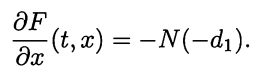    

D'après les résultats du dictionnaire ci-dessus, la stratégie de couverture du put consistera à vendre à découvert 0.4 actifs risqués. La somme à placer dans l'actif sans risque est donné par :

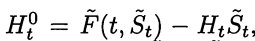

In [38]:
# La quantité d'actifs risqués correspond à la quatrième valeur du tableau
t = 0
r = 0.1
St = 100
S0 = np.exp(-r*t)*St
Value_of_no_risk = np.exp(-r*t)*Values[1] - Values[3]*S0

print(Value_of_no_risk)

43.43228608046484


Conclusion : La stratégie de couverture consistera donc à vendre à découvert 0.4 actifs sous-jacents risqués et à placer 43.43 dans l'actif sans risque.